<h1  style='color:red;'><center>Car Price Prediction</center></h>

<h3  style='color:red;'>1. Import Dependencies</h3>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn import metrics

<h3  style='color:red;'>2. Load Data</h3>

In [2]:
#import the dataset
df = pd.read_csv('dataset/vehicles.csv')

In [3]:
#set display all columns
pd.set_option('display.max_columns',80)
#set display all rows
#pd.set_option('display.max_rows',80)

<h3  style='color:red;'>3. Data Cleansing | Wrnagling</h3>

In [4]:
#check all info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
#drop the features of dataset
df.drop(['url','region_url','image_url','description','lat','long','id','region','county','size',
        'VIN','state', 'posting_date','condition'], axis=1, inplace=True)

In [6]:
#assign data as df
data = df.copy()

In [7]:
#select 2000 up 
data = data[data['year'] > 1999]
data = data[data['price'] > 3000]

In [8]:
#check rows and columns number
data.shape

(340830, 12)

In [9]:
#check null or not
data.isnull().any()

price           False
year            False
manufacturer     True
model            True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
type             True
paint_color      True
dtype: bool

In [10]:
#sum all null values in each featues
data.isnull().sum()

price                0
year                 0
manufacturer     10038
model             2664
cylinders       143049
fuel              2263
odometer          1937
title_status      6052
transmission      1683
drive           101491
type             66957
paint_color      95367
dtype: int64

In [11]:
#drop the null values
data.dropna(axis=0, inplace=True)

In [12]:
#drop other values
data.drop(data.loc[data['transmission']=='other'].index, inplace=True)
data.drop(data.loc[data['type']=='other'].index, inplace=True)

In [13]:
#sum all null values in each featues
data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [14]:
#check samples after cleansing
data.shape

(114605, 12)

In [15]:
#check data type in each features
data.dtypes

price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [16]:
#change data type
data.price = data.price.astype('float')
data.year = data.year.astype('int')

In [17]:
#replace 
data.cylinders = data.cylinders.astype(str)
data.cylinders = data.cylinders.str.replace('cylinders','')
data.cylinders = data.cylinders.str.replace('other','0')
data.cylinders = data.cylinders.astype(int)

In [18]:
#rename the features
data.rename(columns={
    'price':'price',
    'year':'year',
    'manufacturer':'manufacturer',
    'model':'model',
    'cylinders':'cylinder',
    'fuel':'fuel',
    'odometer':'kms_driven',
    'title_status':'status',
    'transmission':'transmission',
    'drive':'drive_wheel',
    'type':'body_type',
    'paint_color':'colour'
}, inplace=True)

In [19]:
# convert model datatype
data.model = data.model.astype(str)

In [20]:
#drop car value count under 100
drop_model_car = data['model'].value_counts()
data = data[~data['model'].isin(drop_model_car[drop_model_car < 100].index)]

In [21]:
#replace other by petrol
data.fuel = data.fuel.replace('other','petrol')

In [22]:
print("**" * 56)
print(data.year.unique())
print("**" * 56)
print("Min Year", data.year.min())
print("**" * 56)
print("Max Year",data.year.max())
print("**" * 56)

****************************************************************************************************************
[2013 2019 2004 2012 2003 2008 2006 2011 2014 2007 2009 2017 2010 2005
 2016 2021 2002 2018 2001 2015 2020 2000]
****************************************************************************************************************
Min Year 2000
****************************************************************************************************************
Max Year 2021
****************************************************************************************************************


In [23]:
#replace manufacturer 
data.manufacturer = data.manufacturer.str.replace('-',' ')

In [24]:
print("**" * 56)
print(data.manufacturer.unique())
print("**" * 56)

****************************************************************************************************************
['ford' 'toyota' 'honda' 'chrysler' 'jeep' 'nissan' 'buick' 'hyundai'
 'gmc' 'chevrolet' 'volvo' 'ram' 'dodge' 'kia' 'volkswagen' 'acura'
 'cadillac' 'bmw' 'lexus' 'mercedes benz' 'lincoln' 'subaru' 'audi'
 'pontiac' 'rover' 'mazda' 'mitsubishi' 'mini']
****************************************************************************************************************


In [25]:
print("**" * 56)
print("Number Of Model Car - Unique Values :",len(data['model'].value_counts()))
print("**" * 56)

****************************************************************************************************************
Number Of Model Car - Unique Values : 197
****************************************************************************************************************


In [26]:
print("**" * 56)
print(data.cylinder.value_counts())
print("**" * 56)

****************************************************************************************************************
4     23999
6     19854
8     14996
5       394
0       208
10      196
3        63
12        3
Name: cylinder, dtype: int64
****************************************************************************************************************


In [27]:
print("**" * 56)
print(data.fuel.value_counts())
print("**" * 56)

****************************************************************************************************************
gas         54943
diesel       3654
hybrid        621
petrol        491
electric        4
Name: fuel, dtype: int64
****************************************************************************************************************


In [28]:
print("**" * 56)
print("MAX Meters",data.kms_driven.max())
print("**" * 56)
print("MIN Meters",data.kms_driven.min())
print("**" * 56)
print("AVERAGE Meters",data.kms_driven.mean())
print("**" * 56)

****************************************************************************************************************
MAX Meters 9999999.0
****************************************************************************************************************
MIN Meters 0.0
****************************************************************************************************************
AVERAGE Meters 105358.54410262422
****************************************************************************************************************


In [29]:
#print("**" * 56)
#print(data.condition.value_counts())
#print("**" * 56)

In [30]:
print("**" * 56)
print(data.status.value_counts())
print("**" * 56)

****************************************************************************************************************
clean         56890
rebuilt        1723
salvage         681
lien            403
missing          11
parts only        5
Name: status, dtype: int64
****************************************************************************************************************


In [31]:
print("**" * 56)
print(data.transmission.value_counts())
print("**" * 56)

****************************************************************************************************************
automatic    56897
manual        2816
Name: transmission, dtype: int64
****************************************************************************************************************


In [32]:
print("**" * 56)
print(data.drive_wheel.value_counts())
print("**" * 56)

****************************************************************************************************************
4wd    26678
fwd    24216
rwd     8819
Name: drive_wheel, dtype: int64
****************************************************************************************************************


In [33]:
print("**" * 56)
print(data.body_type.value_counts())
print("**" * 56)

****************************************************************************************************************
sedan          18204
SUV            17177
truck          10117
pickup          5876
coupe           2063
wagon           1652
hatchback       1463
van             1343
mini-van        1222
convertible      457
offroad          133
bus                6
Name: body_type, dtype: int64
****************************************************************************************************************


In [34]:
print("**" * 56)
print(data.colour.value_counts())
print("**" * 56)

****************************************************************************************************************
white     13699
black     11366
silver     9235
grey       7915
blue       5906
red        5518
custom     2780
brown      1351
green      1182
yellow      366
orange      269
purple      126
Name: colour, dtype: int64
****************************************************************************************************************


In [35]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'cylinder', 'fuel',
       'kms_driven', 'status', 'transmission', 'drive_wheel', 'body_type',
       'colour'],
      dtype='object')

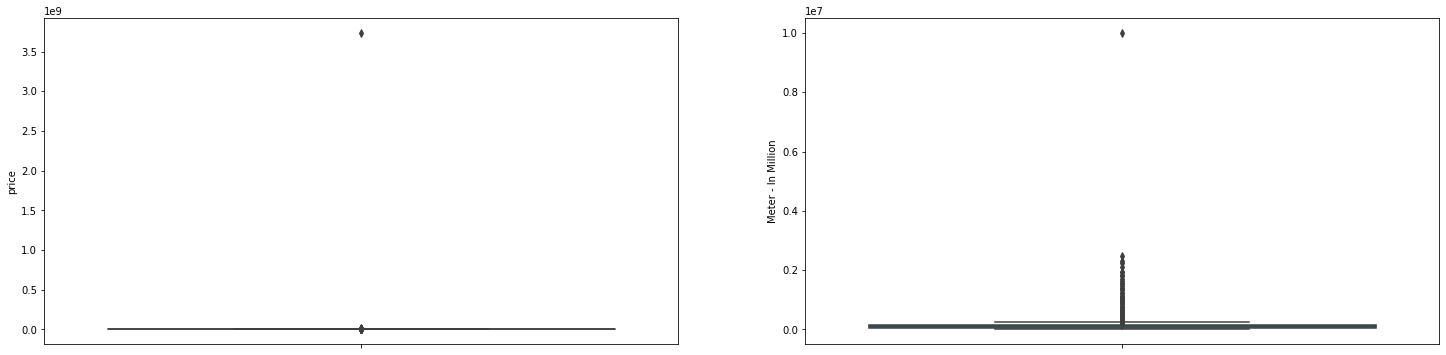

In [36]:
#check outlier
f, axes = plt.subplots(ncols=2, figsize=(25, 6))

sns.boxplot(y=data['price'], ax=axes[0])
sns.boxplot(y=data['kms_driven'], ax=axes[1])
plt.ylabel('Meter - In Million')
plt.show()

In [37]:
from scipy.stats import zscore

for i in range(1,6):
    #remove outliers
    data['meter_outliers'] = zscore(data['kms_driven'])
    #define meter outliers
    data[(data.meter_outliers > 3.0) | (data.meter_outliers < -3.0) ]
    #drop outliers
    data = data.drop(data[(data.meter_outliers > 3.0) | (data.meter_outliers < -3.0) ].index)

In [38]:
for i in range(1,6):    
    #remove price outliers
    data['price_outliers'] = zscore(data['price'])
    #define meter outliers
    data[(data.price_outliers > 3.0) | (data.price_outliers < -3.0) ]
    #drop outliers
    data = data.drop(data[(data.price_outliers > 3.0) | (data.price_outliers < -3.0) ].index)

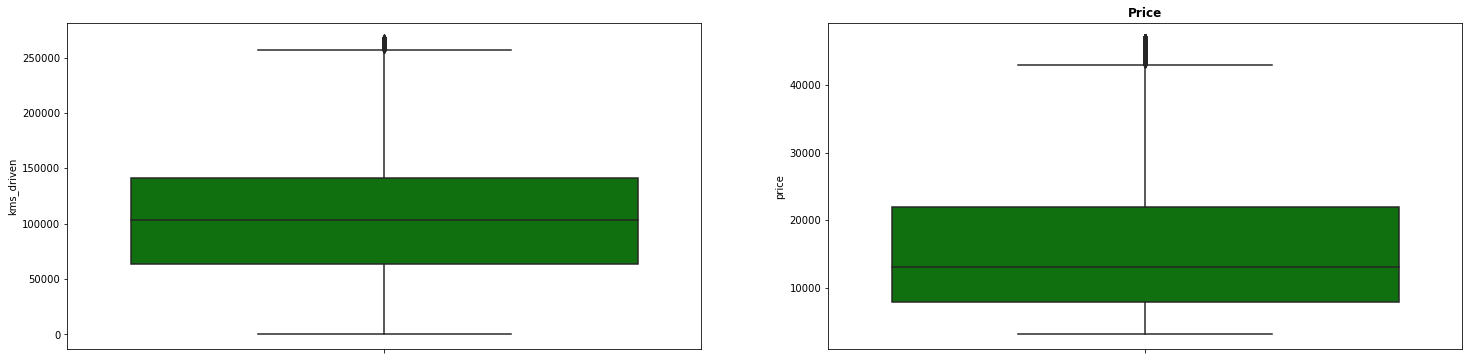

In [39]:
f, axes = plt.subplots(ncols=2, figsize=(25, 6))
sns.boxplot(y=data['kms_driven'], color='green',ax=axes[0])
plt.title('ODO Meter', fontweight='bold')
sns.boxplot(y=data['price'], color='green',ax=axes[1])
plt.title('Price', fontweight='bold')
plt.show()

In [40]:
#drop meter outliers column
data.drop('meter_outliers', axis=1, inplace=True)
data.drop('price_outliers', axis=1, inplace=True)

In [41]:
#drop cylinder = 0
data = data.drop(data[(data.cylinder == 0)].index)

In [42]:
data.describe(include='all')

,price,year,manufacturer,model,cylinder,fuel,kms_driven,status,transmission,drive_wheel,body_type,colour
count,57508.000000,57508.000000,57508,57508,57508.000000,57508,57508.000000,57508,57508,57508,57508,57508
unique,NaN,NaN,28,197,NaN,5,NaN,6,2,3,12,12
top,NaN,NaN,ford,f-150,NaN,gas,NaN,clean,automatic,4wd,sedan,white
freq,NaN,NaN,11781,2298,NaN,53773,NaN,54741,54828,24908,18103,12981
mean,15998.892711,2012.281665,NaN,NaN,5.643545,NaN,104508.466126,NaN,NaN,NaN,NaN,NaN
std,10223.575719,4.586639,NaN,NaN,1.596465,NaN,54500.248767,NaN,NaN,NaN,NaN,NaN
min,3050.000000,2000.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,7900.000000,2009.000000,NaN,NaN,4.000000,NaN,63719.750000,NaN,NaN,NaN,NaN,NaN
50%,12999.000000,2013.000000,NaN,NaN,6.000000,NaN,103090.000000,NaN,NaN,NaN,NaN,NaN
75%,21995.000000,2016.000000,NaN,NaN,6.000000,NaN,141000.000000,NaN,NaN,NaN,NaN,NaN


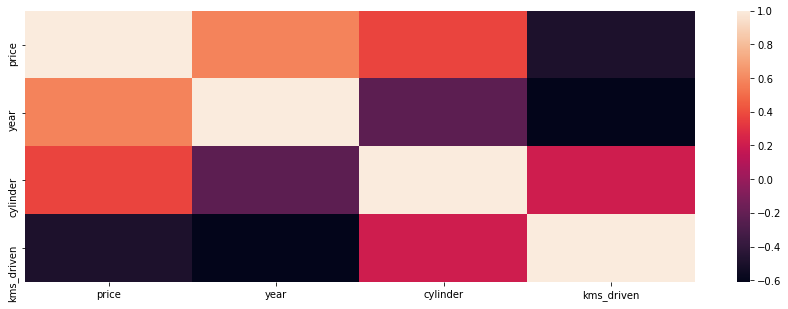

In [43]:
plt.figure(figsize=(15,5))
correlation = data.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values)
plt.show()

In [44]:
# calculate Pearson's correlation
#from scipy.stats import pearsonr
#corr, _ = pearsonr(data['price'], data['year'])
#print('Pearsons correlation: %.3f' % corr)

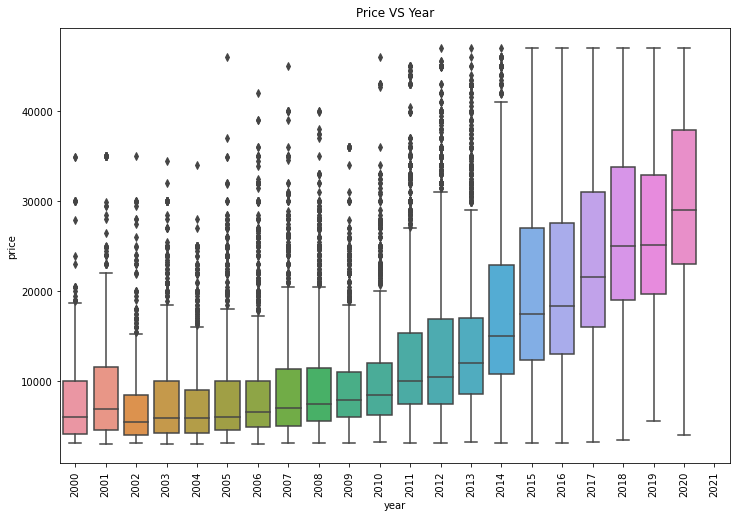

In [45]:
year_list = list(range(2000, 2021))

vehicles_year = data[data.year.astype(int).isin(year_list)]
#vehicles_odo = vehicles_prc[(vehicles_prc.odometer >100) & (vehicles_prc.odometer <=200000)]

# Plot again to visualize distribution
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price VS Year', pad=12)
fig = sns.boxplot(x=data.year.astype(int), y='price', data=vehicles_year)
plt.xticks(rotation=90);

<h3 style='color:red;'>4. Data Preprocessing</h3>

In [46]:
#define a variable
vehicle_dummies = data[['price',
                        'year',
                        'manufacturer',
                        'cylinder',
                        'model',
                        'fuel',
                        'kms_driven',
                        'status',
                        'transmission',
                        'drive_wheel',
                        'body_type',
                        'colour']]

In [47]:
# Defining the map function
#this model doesnt apply 
def cat_dummies(x,data):
    va_dummies = pd.get_dummies(data[x], drop_first = False)
    data = pd.concat([data, va_dummies], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

In [48]:
#print the dtype of each columns
vehicle_dummies.dtypes

price           float64
year              int64
manufacturer     object
cylinder          int64
model            object
fuel             object
kms_driven      float64
status           object
transmission     object
drive_wheel      object
body_type        object
colour           object
dtype: object

In [49]:
# Applying the function to the cat_demmies
#vehicle_dummies = cat_dummies('manufacturer',vehicle_dummies)
#vehicle_demmies = cat_dummies('model',vehicle_demmies)
#vehicle_dummies = cat_dummies('condition',vehicle_dummies)
#vehicle_dummies = cat_dummies('fuel',vehicle_dummies)
#vehicle_dummies = cat_dummies('status',vehicle_dummies)
#vehicle_dummies = cat_dummies('transmission',vehicle_dummies)
#vehicle_dummies = cat_dummies('drive_wheel',vehicle_dummies)
#vehicle_dummies = cat_dummies('body_type',vehicle_dummies)
#vehicle_dummies = cat_dummies('colour',vehicle_dummies)

<h3 style='color:red;'>**************** Feature Scaling ****************</h3>

In [50]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()

#label encoder for model features
#replace 1-1XX to model features
#vehicle_dummies.price = label_enconder.fit_transform(vehicle_dummies.price)
#vehicle_dummies.year = label_enconder.fit_transform(vehicle_dummies.year)
vehicle_dummies.manufacturer = label_enconder.fit_transform(vehicle_dummies.manufacturer)
vehicle_dummies.model = label_enconder.fit_transform(vehicle_dummies.model)
#vehicle_dummies.condition = label_enconder.fit_transform(vehicle_dummies.condition)
#vehicle_dummies.cylinder = label_enconder.fit_transform(vehicle_dummies.cylinder)
vehicle_dummies.fuel = label_enconder.fit_transform(vehicle_dummies.fuel)
#vehicle_dummies.kms_driven = label_enconder.fit_transform(vehicle_dummies.kms_driven)
vehicle_dummies.status = label_enconder.fit_transform(vehicle_dummies.status)
vehicle_dummies.transmission = label_enconder.fit_transform(vehicle_dummies.transmission)
vehicle_dummies.drive_wheel = label_enconder.fit_transform(vehicle_dummies.drive_wheel)
vehicle_dummies.body_type = label_enconder.fit_transform(vehicle_dummies.body_type)
vehicle_dummies.colour = label_enconder.fit_transform(vehicle_dummies.colour)

In [51]:
#check rows and columns
vehicle_dummies.shape

(57508, 12)

In [52]:
#print the columns
print("Number Of Columns:", len(vehicle_dummies.columns))

Number Of Columns: 12


In [53]:
#print the dtype of each columns
vehicle_dummies.dtypes

price           float64
year              int64
manufacturer      int64
cylinder          int64
model             int64
fuel              int64
kms_driven      float64
status            int64
transmission      int64
drive_wheel       int64
body_type         int64
colour            int64
dtype: object

In [54]:
#use train test split function
# np.random.seed(0) makes the random numbers predictable
np.random.seed(0)
data_train, data_test = train_test_split(vehicle_dummies, test_size = 0.3, random_state = 100)

In [55]:
data_train.shape

(40255, 12)

In [56]:
data_test.shape

(17253, 12)

In [57]:
#features selecting of vihecle 
#num_variables = ['price', 'year', 'model', 'cylinder', 'kms_driven', 'acura', 'audi',
#       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',
#       'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus', 'lincoln', 'mazda',
#       'mercedes benz', 'mini', 'nissan', 'pontiac', 'ram', 'subaru', 'toyota',
#       'volkswagen', 'excellent', 'fair', 'good', 'like new', 'new', 'salvage',
#       'diesel', 'electric', 'gas', 'hybrid', 'petrol', 'clean', 'lien',
#       'missing', 'parts only', 'rebuilt', 'salvage', 'automatic', 'manual',
#       '4wd', 'fwd', 'rwd', 'SUV', 'bus', 'convertible', 'coupe', 'hatchback',
#       'mini-van', 'offroad', 'pickup', 'sedan', 'truck', 'van', 'wagon',
#       'black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange', 'purple',
#       'red', 'silver', 'white', 'yellow']

In [58]:
#let's scale the features
#scaler = MinMaxScaler()
#data_train[num_variables] = scaler.fit_transform(data_train[num_variables])
#data_test[num_variables] = scaler.fit_transform(data_test[num_variables])

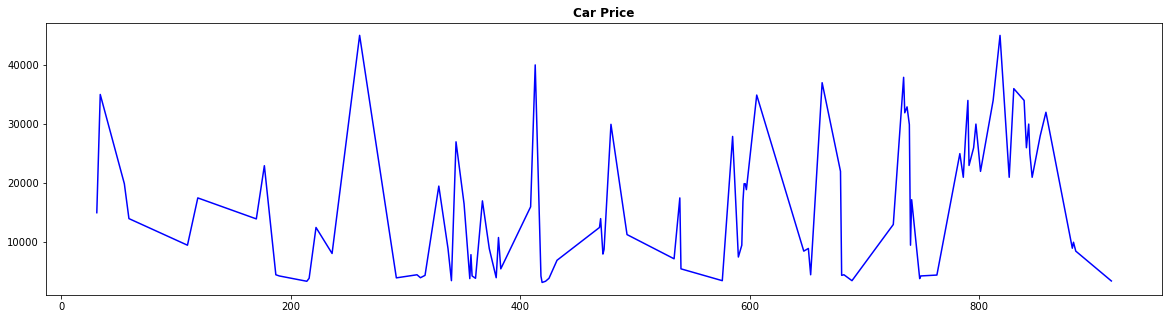

In [59]:
plt.figure(figsize=(20,5))
plt.plot(data['price'][0:100], color='b')
plt.title("Car Price", fontweight='bold')
plt.show()

<h3  style='color:red;'>5. Train Model</h3>

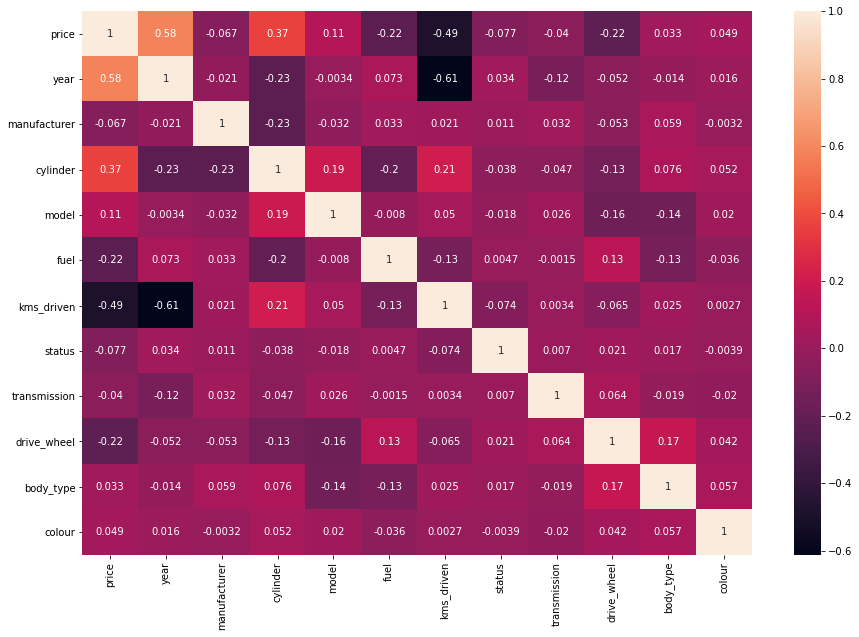

In [60]:
plt.figure(figsize=(15,10))
correlation_train = data_train.corr(method='pearson')
sns.heatmap(correlation_train,
           xticklabels=correlation_train.columns.values,
           yticklabels=correlation_train.columns.values, annot=True)
plt.show()

In [61]:
#check statistic description
data_train.describe()

,price,year,manufacturer,cylinder,model,fuel,kms_driven,status,transmission,drive_wheel,body_type,colour
count,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000
mean,15964.441833,2012.265880,11.957322,5.645162,93.162464,1.934667,104549.629189,0.182586,0.047472,0.717004,5.482574,5.535387
std,10195.123225,4.601174,7.432739,1.595470,56.055468,0.474211,54538.140273,0.857630,0.212650,0.707407,3.822630,3.962572
min,3050.000000,2000.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7900.000000,2009.000000,7.000000,4.000000,43.000000,2.000000,63900.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,12999.000000,2013.000000,9.000000,6.000000,92.000000,2.000000,103302.000000,0.000000,0.000000,1.000000,8.000000,5.000000
75%,21995.000000,2016.000000,20.000000,6.000000,145.000000,2.000000,141200.000000,0.000000,0.000000,1.000000,8.000000,9.000000
max,47000.000000,2021.000000,27.000000,10.000000,196.000000,4.000000,267680.000000,5.000000,1.000000,2.000000,11.000000,11.000000


In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40255 entries, 267095 to 284056
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         40255 non-null  float64
 1   year          40255 non-null  int64  
 2   manufacturer  40255 non-null  int64  
 3   cylinder      40255 non-null  int64  
 4   model         40255 non-null  int64  
 5   fuel          40255 non-null  int64  
 6   kms_driven    40255 non-null  float64
 7   status        40255 non-null  int64  
 8   transmission  40255 non-null  int64  
 9   drive_wheel   40255 non-null  int64  
 10  body_type     40255 non-null  int64  
 11  colour        40255 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.0 MB


In [63]:
#Dividing data train into x and y variables
Y = data_train.pop('price')
X = data_train

In [64]:
print(X.shape)
print(Y.shape)

(40255, 11)
(40255,)


In [65]:
X.columns

Index(['year', 'manufacturer', 'cylinder', 'model', 'fuel', 'kms_driven',
       'status', 'transmission', 'drive_wheel', 'body_type', 'colour'],
      dtype='object')

In [66]:
#Apply train_test_split funtion to random dataset
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=123)

In [67]:
#if len(x_train.shape) < 2:
#    x_train = np.array(x_train).reshape(-1,1)
#    x_test = np.array(x_test).reshape(-1,1)

<h3 style='color:red;'>Linear Regression - Linear Regression</h3>

In [68]:
#set l_m
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline
l_m = linear_model.LinearRegression()
#l_m = LinearRegression()

#l_m = PoissonRegressor()
#model = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [69]:
%%time
#Train the model
model = l_m.fit(x_train, y_train)

CPU times: user 158 ms, sys: 20.8 ms, total: 178 ms
Wall time: 188 ms


In [70]:
# learned parameters
#weights = model.coef_
#bias = model.intercept_

#Linear: y = ax + b
#Linear: y = weight(x)  + Bias

#print('Model parameters as follows:')

#print("--" * 58)
#print("+++ Coeffients: +++")
#for i in weights:
#    print(i)
#print("--" * 58)
#print("+++ Interceptor: +++")
#print('Bias: ', bias)

In [71]:
# learned parameters
print("Intercept value of Model is: " ,model.intercept_)
print("**" * 54)
print("Coefficient value of Model is: ", model.coef_)

Intercept value of Model is:  -2315069.1453120373
************************************************************************************************************
Coefficient value of Model is:  [ 1.15625840e+03  8.89945464e+01  3.22567047e+03  2.08722459e+00
 -4.04766595e+03 -5.97305405e-02 -1.15432298e+03  2.37589775e+03
 -1.72544508e+03  1.07444054e+01  3.72028327e+01]


<h3 style='color:red;'>6. Evaluation Model</h3>

In [72]:
#Try to prediction & test
y_prediction = l_m.predict(x_test)

In [73]:
#check the result
y_prediction_values = pd.DataFrame(list(zip(y_test[0:10], y_prediction[0:10])), 
                                     columns=['Y_Test', 'Y_Predicted'])
y_prediction_values.head(10)

,Y_Test,Y_Predicted
0,4399.0,1448.905360
1,6900.0,9425.099972
2,36000.0,30639.153952
3,8500.0,11771.427881
4,4995.0,3421.452805
5,6700.0,6347.988442
6,8000.0,11120.145310
7,5900.0,15160.484969
8,32888.0,31650.689027
9,39991.0,33821.467200


In [74]:
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print("##" * 58)
print('Mean squared error: ', mse)
print("##" * 58)
print('Mean absolute error: ', mae)
print("##" * 58)
print('R2 score: ', r2)
print("##" * 58)

####################################################################################################################
Mean squared error:  30174563.66623845
####################################################################################################################
Mean absolute error:  4253.871262680703
####################################################################################################################
R2 score:  0.705139302693023
####################################################################################################################


<h3 style='color:red;'>**************** Over Fitting VS Under Fitting ****************</h3>

In [75]:
#Check train data score of model
train_score = model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 58)
print("Model Score (%) :", train_score * 100)

Model Score: 0.7148998841798426
********************************************************************************************************************
Model Score (%) : 71.48998841798426


In [76]:
#Check test data score of model
test_score = model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 58)
print("Model Score (%) :", test_score * 100)

Model Score: 0.705139302693023
********************************************************************************************************************
Model Score (%) : 70.5139302693023


<h3 style='color:red;'>**************** Plot The Result ****************</h3>

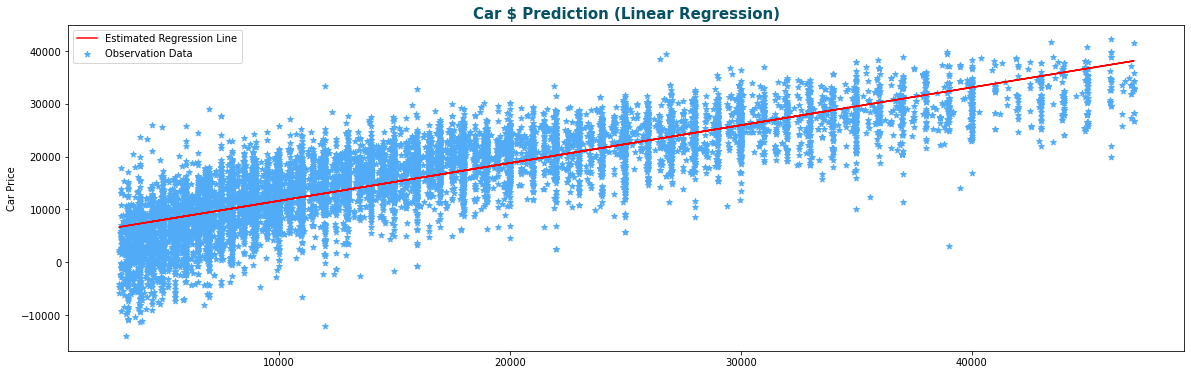

In [77]:
#Plot the results 
#Plot data ft scatter plot
#ravel() function can solve the problem replace to values() function

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(y_test, y_prediction, color='#51ABF7', marker='*')

#Draw a regression line
y_test, y_prediction = y_test.ravel().reshape(-1,1), y_prediction.ravel().reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_prediction).predict(y_test), color='r')
plt.title("Car $ Prediction (Linear Regression)", color="#065164",fontsize='15', fontweight='bold')
plt.legend(['Estimated Regression Line', 'Observation Data'])
plt.ylabel("Car Price")
plt.show()



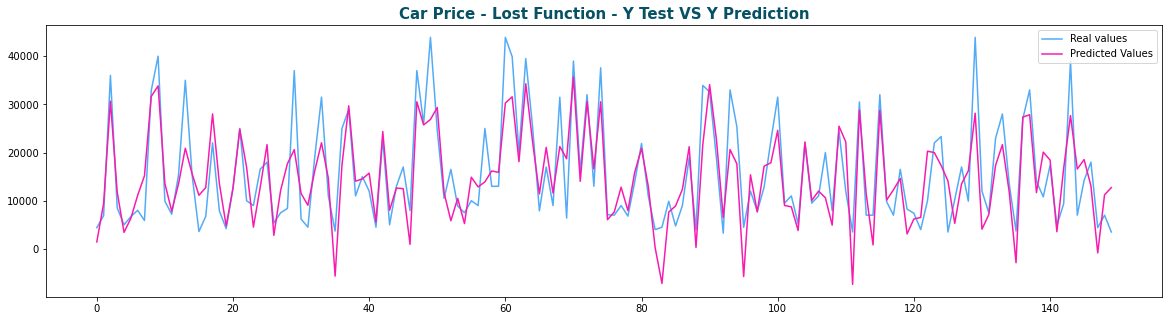

In [78]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_prediction, y_test)), columns=['predicted_car_price', 
                                                                           'real_car_price'])

plt.figure(figsize=(20, 5))
plt.plot(y_test[0:150].ravel(), label='Real values', color='#51ABF7')
plt.plot(prediction_values['predicted_car_price'][0:150].ravel(), label='Predicted Values', color='#F91AAF')

plt.title('Car Price - Lost Function - Y Test VS Y Prediction',color="#065164",fontsize='15', fontweight='bold')
plt.legend(loc=1)
plt.show()

<h3 style='color:red;'>**************** Hyperparameter Tuning ****************</h3>

In [79]:
#Define X,y for train_test_split
x_val = data_test.drop(['price'], axis=1)
y_val = data_test['price']

In [80]:
#Apply k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection  import cross_val_score
from sklearn import model_selection

In [82]:
#set cross validation
#n_split = 5
# test_size = 0.3
#cv = ShuffleSplit(n_splits=5 , test_size=0.3 , random_state=10)
kfold = model_selection.KFold(n_splits=20, random_state=7,shuffle=True)  #,shuffle=True)

In [83]:
#process cross validation 
#apply 5-vold cross validation to linear regression
cross_validation_score = cross_val_score(l_m, x_val, y_val, cv=kfold)
#print the result
print("++" * 58)
print("Number of Score in each Iteration: ")
print("++" * 58)
for i,j in enumerate(cross_validation_score):
    print(i,"/",j)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Number of Score in each Iteration: 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0 / 0.6839505909673095
1 / 0.7257390674113396
2 / 0.7224809758073873
3 / 0.7186383756269128
4 / 0.7254036147000944
5 / 0.7037309148397524
6 / 0.7284645495126807
7 / 0.7101278810304568
8 / 0.6892355103464338
9 / 0.7282959481602111
10 / 0.7220541292220147
11 / 0.7132058735685619
12 / 0.7054554837599812
13 / 0.6737847002780322
14 / 0.7219394709740006
15 / 0.721323987252714
16 / 0.7038367011060507
17 / 0.7060471614753296
18 / 0.7195084794571276
19 / 0.7076050220792425


In [84]:
#select best model accuracy score
print("Best Model Accuray Score in K-Fold Cross Validation")
print(cross_validation_score.max())

Best Model Accuray Score in K-Fold Cross Validation
0.7284645495126807


In [85]:
#make a prediction on data validation
y_val_predict = l_m.predict(x_val)

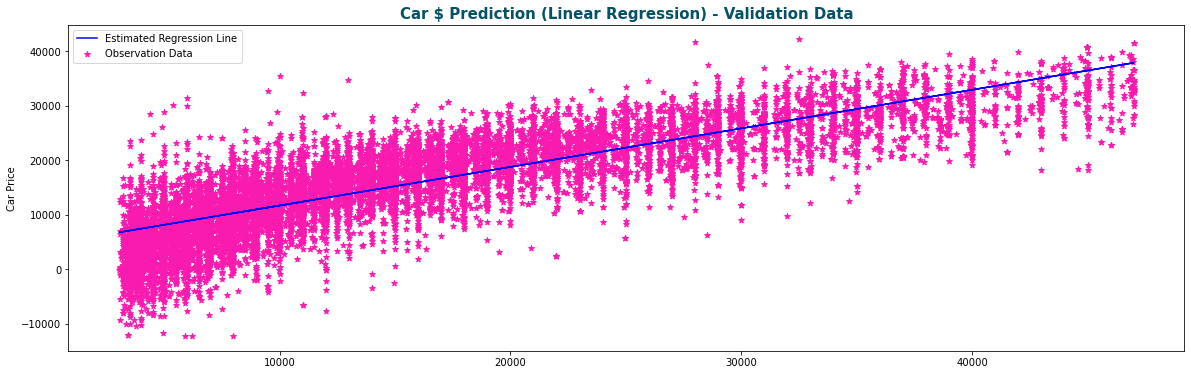

In [86]:
#Plot the results 
#Plot data ft scatter plot
#ravel() function can solve the problem replace to values() function

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(y_val, y_val_predict, color='#F91AAF', marker='*')

#Draw a regression line
y_val, y_val_predict = y_val.ravel().reshape(-1,1), y_val_predict.ravel().reshape(-1,1)
ax.plot(y_val, LinearRegression().fit(y_val, y_val_predict).predict(y_val), color='b')
#ax.set_ylim([5000,50000])
plt.title("Car $ Prediction (Linear Regression) - Validation Data", color="#065164",fontsize='15', fontweight='bold')
plt.legend(['Estimated Regression Line', 'Observation Data'])
plt.ylabel("Car Price")
plt.show()

In [87]:
#from scipy.stats import linregress
#slope,intercept,r,p_value,std_err = linregress(x_train,y_train)
#a = [slope,intercept]
#print('R^2 linregress = '+str(r**2))

<h3 style='color:red;'>**************** Model Testing ****************</h3>

In [88]:
#create a function to make the prediction
def car_price_prediction(year, manufacturer, cylinder, model, fuel, kms_driven, status,tranmission, drive_wheel, body_type,colour):
    data = [[year, manufacturer, cylinder, model, fuel, kms_driven, status,tranmission, drive_wheel, body_type,colour]]
    result = l_m.predict(data)
    print("$$" * 58)
    print("\t\t\t\t\t The Car Price Prediction ($) :") 
    print("$$" * 58)
    print()
    if result < 0:
        print("Base On Your Car's Information, Model Doesn't Work For It")
    else:
        return result 

In [89]:
print(car_price_prediction(2017 ,23, 6, 3, 2,2500.0, 0,0,1,10,8))
print()
print()
print(car_price_prediction(2018.0 ,4, 8, 5, 3,2500.0, 2,4,3,4,3))
print()
print()
print(car_price_prediction(2002 ,4, 8, 5, 3,2500, 2,4,3,4,3))
print()
print()
print(car_price_prediction(2013,3,8,7,2,11843.0,0,0,0,3,0))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
					 The Car Price Prediction ($) :
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

[28946.16920825]


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
					 The Car Price Prediction ($) :
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

[34312.95499044]


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
					 The Car Price Prediction ($) :
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

[15812.82059652]


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
					 The 

In [90]:
#Test on Khmer24 Car dataset
print(car_price_prediction(2002 ,1, 6, 1, 3,1000, 0,0,1,1,3))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
					 The Car Price Prediction ($) :
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

[5399.45479631]


In [94]:
#export ml model
import pickle
with open('car_price_prediction_linear_regression.pickle', 'wb') as f:
    #model 
    pickle.dump(model, f)